# U.S. Medical Insurance Costs

In [121]:
import pandas as pd
import csv
insurance_df = pd.read_csv('insurance.csv')
print(insurance_df.head(20))

    age     sex     bmi  children smoker     region      charges
0    19  female  27.900         0    yes  southwest  16884.92400
1    18    male  33.770         1     no  southeast   1725.55230
2    28    male  33.000         3     no  southeast   4449.46200
3    33    male  22.705         0     no  northwest  21984.47061
4    32    male  28.880         0     no  northwest   3866.85520
5    31  female  25.740         0     no  southeast   3756.62160
6    46  female  33.440         1     no  southeast   8240.58960
7    37  female  27.740         3     no  northwest   7281.50560
8    37    male  29.830         2     no  northeast   6406.41070
9    60  female  25.840         0     no  northwest  28923.13692
10   25    male  26.220         0     no  northeast   2721.32080
11   62  female  26.290         0    yes  southeast  27808.72510
12   23    male  34.400         0     no  southwest   1826.84300
13   56  female  39.820         0     no  southeast  11090.71780
14   27    male  42.130  

In [122]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [123]:
insurance_df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## Find averages using `DictReader()`

In [124]:
def average_calculator(attribute, num_rows):
    with open('insurance.csv', newline='')as csvfile:
        reader = csv.DictReader(csvfile)
        total = 0
        for row in reader:
            total += float(row[attribute])
        return total/num_rows

In [125]:
# Find the mean of data:

num_rows = len(insurance_df)
print("Number of entries: ", num_rows)

#Average charge:
average_charges = average_calculator('charges', num_rows)
print("Average charges: ", round(average_charges, 2))

#Average age:
average_age = average_calculator('age', num_rows)
print("Average age: ", round(average_age, 2))

#Average number of children
average_children = average_calculator('children', num_rows)
print("Average children: ", int(average_children))

#Average bmi:
average_bmi = average_calculator('bmi', num_rows)
print("Average bmi: ", round(average_bmi, 2))


Number of entries:  1338
Average charges:  13270.42
Average age:  39.21
Average children:  1
Average bmi:  30.66


## However, general statistics can be found using `describe()`

In [126]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


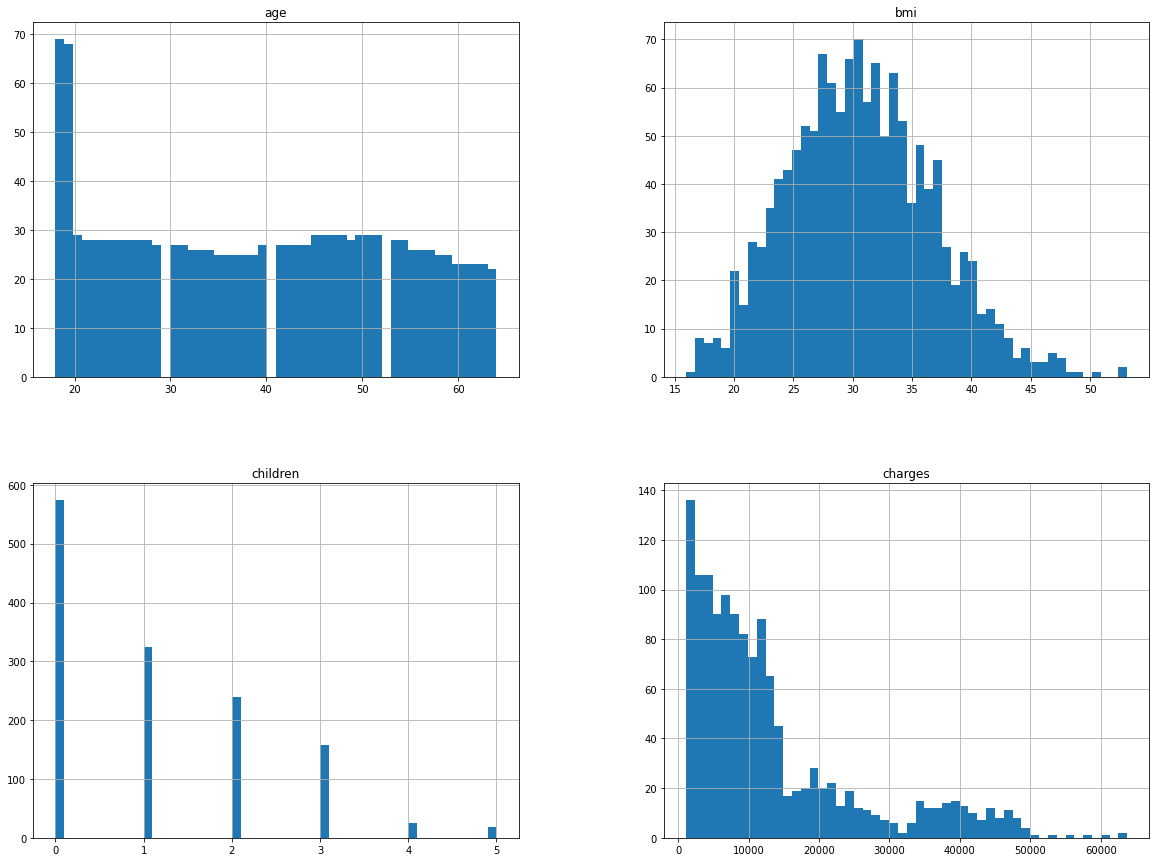

In [127]:
%matplotlib inline
import matplotlib.pyplot as plt
insurance_df.hist(bins=50, figsize=(20,15))
plt.show()

In [128]:
corr_matrix = insurance_df.corr()

In [129]:
corr_matrix["age"].sort_values(ascending=False)

age         1.000000
charges     0.299008
bmi         0.109272
children    0.042469
Name: age, dtype: float64

In [130]:
corr_matrix['bmi'].sort_values(ascending=False)

bmi         1.000000
charges     0.198341
age         0.109272
children    0.012759
Name: bmi, dtype: float64

In [131]:
corr_matrix['children'].sort_values(ascending=False)

children    1.000000
charges     0.067998
age         0.042469
bmi         0.012759
Name: children, dtype: float64

In [132]:
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='bmi', ylabel='age'>,
        <AxesSubplot:xlabel='children', ylabel='age'>,
        <AxesSubplot:xlabel='charges', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='bmi'>,
        <AxesSubplot:xlabel='bmi', ylabel='bmi'>,
        <AxesSubplot:xlabel='children', ylabel='bmi'>,
        <AxesSubplot:xlabel='charges', ylabel='bmi'>],
       [<AxesSubplot:xlabel='age', ylabel='children'>,
        <AxesSubplot:xlabel='bmi', ylabel='children'>,
        <AxesSubplot:xlabel='children', ylabel='children'>,
        <AxesSubplot:xlabel='charges', ylabel='children'>],
       [<AxesSubplot:xlabel='age', ylabel='charges'>,
        <AxesSubplot:xlabel='bmi', ylabel='charges'>,
        <AxesSubplot:xlabel='children', ylabel='charges'>,
        <AxesSubplot:xlabel='charges', ylabel='charges'>]], dtype=object)

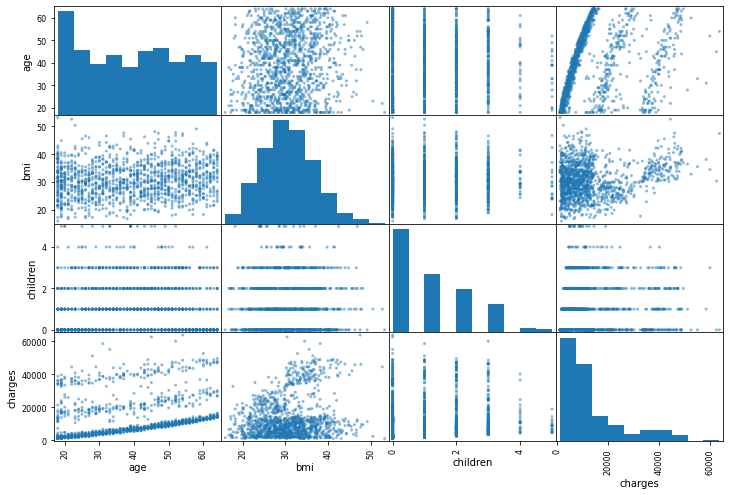

In [133]:
from pandas.plotting import scatter_matrix

attributes = ['age', 'bmi', 'children', 'charges']
scatter_matrix(insurance_df[attributes], figsize=(12,8))


<AxesSubplot:xlabel='age', ylabel='charges'>

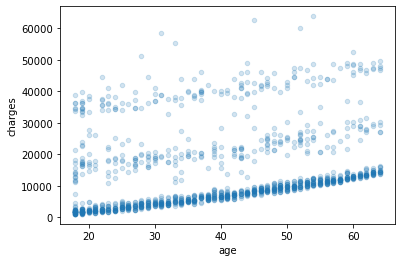

In [134]:
insurance_df.plot(kind="scatter", x='age', y='charges', alpha=0.2)

The above plot shows that as age increases, charges will increase.

In [138]:
from sklearn.preprocessing import OneHotEncoder

insurance_cat_region = insurance_df[['region']]
insurance_cat_smoker = insurance_df[['smoker']]
insurance_cat_sex = insurance_df[['sex']]

cat_encoder = OneHotEncoder()
insurance_region_1hot = cat_encoder.fit_transform(insurance_cat_region)
print(cat_encoder.categories_)
insurance_smoker_1hot = cat_encoder.fit_transform(insurance_cat_smoker)
print(cat_encoder.categories_)
insurance_sex_1hot = cat_encoder.fit_transform(insurance_cat_sex)
print(cat_encoder.categories_)


print(insurance_region_1hot.toarray())
print(insurance_smoker_1hot.toarray())
print(insurance_sex_1hot.toarray())
#insurance_df[['region']]=insurance_region_1hot
insurance_df.head(10)


[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]
[array(['no', 'yes'], dtype=object)]
[array(['female', 'male'], dtype=object)]
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [117]:
insurance_df_cat = insurance_df
insurance_df_cat[['region']] = insurance_region_1hot
insurance_df_cat[['smoker']] = insurance_smoker_1hot
insurance_df_cat[['sex']] = insurance_sex_1hot
insurance_df_cat

,age,sex,bmi,children,smoker,region,charges
0,19,"(0, 0)\t1.0",27.900,0,"(0, 1)\t1.0","(0, 3)\t1.0",16884.92400
1,18,"(0, 1)\t1.0",33.770,1,"(0, 0)\t1.0","(0, 2)\t1.0",1725.55230
2,28,"(0, 1)\t1.0",33.000,3,"(0, 0)\t1.0","(0, 2)\t1.0",4449.46200
3,33,"(0, 1)\t1.0",22.705,0,"(0, 0)\t1.0","(0, 1)\t1.0",21984.47061
4,32,"(0, 1)\t1.0",28.880,0,"(0, 0)\t1.0","(0, 1)\t1.0",3866.85520
...,...,...,...,...,...,...,...
1333,50,"(0, 1)\t1.0",30.970,3,"(0, 0)\t1.0","(0, 1)\t1.0",10600.54830
1334,18,"(0, 0)\t1.0",31.920,0,"(0, 0)\t1.0","(0, 0)\t1.0",2205.98080
1335,18,"(0, 0)\t1.0",36.850,0,"(0, 0)\t1.0","(0, 2)\t1.0",1629.83350
1336,21,"(0, 0)\t1.0",25.800,0,"(0, 0)\t1.0","(0, 3)\t1.0",2007.94500


<AxesSubplot:xlabel='smoker', ylabel='charges'>

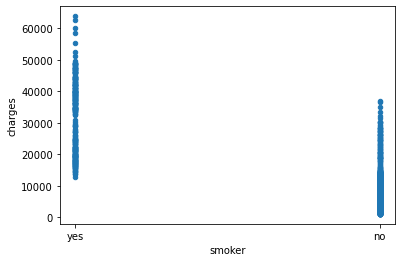

In [145]:
#insurance_df_cat.hist(bins=2, figsize=(20,15))
insurance_df.plot(kind="scatter", x='smoker', y='charges')


<AxesSubplot:xlabel='sex', ylabel='charges'>

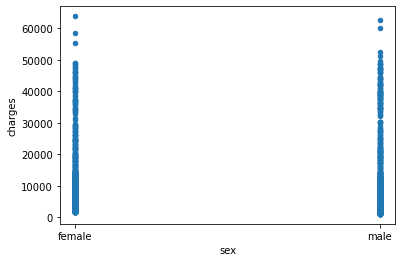

In [146]:
insurance_df.plot(kind="scatter", x="sex", y='charges')

<AxesSubplot:xlabel='region', ylabel='charges'>

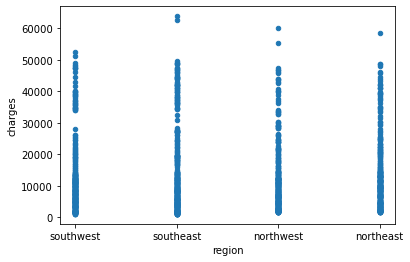

In [147]:
insurance_df.plot(kind='scatter', x='region', y='charges')